![header](../figures/logos_partenaires._cmems_se.jpg)

# Benchmark SWOT Swath Filtering

<div style="text-align: right"><i> 2022-08-24 QUICKSTART </i></div>

***
**Authors:**  CLS & Datlas <br>
**Copyright:** 2022 CLS & Datlas <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center>Benchmark of Quickstart</center></h1></div>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***


<div class="alert alert-danger" role="alert">

<h3>Learning outcomes</h3>

At the end of this notebook you will know:
<ul>
  <li>How you can display unfiltered, filtered SWOT Level3 SSH products.</li>
  <li>How you can evaluate the quickstart: statistical and spectral analysis.</li>
</ul>
    
</div>



In [1]:
import os
import glob
import sys
sys.path.append('..')
from src.benchmark import *
from src.plot import *
from src.swot import *

Bad value in file '/home/mballarotta/.config/matplotlib/matplotlibrc', line 38 ('backend      : qt4agg'): Key backend: 'qt4agg' is not a valid value for backend; supported values are ['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


<div class="alert alert-info" role="alert">

<h2>1. Input files to analyse</h2>

</div>

In [2]:
list_of_file_inputs = sorted(glob.glob('../dc_inputs/input_ssh_karin_013_00*.nc')) 

In [3]:
list_of_file = sorted(glob.glob('../results/quickstart_my_filter0.nc')) 

<div class="alert alert-info" role="alert">

<h2>2. Illustration on one pass (same as quickstart example)</h2>

</div>

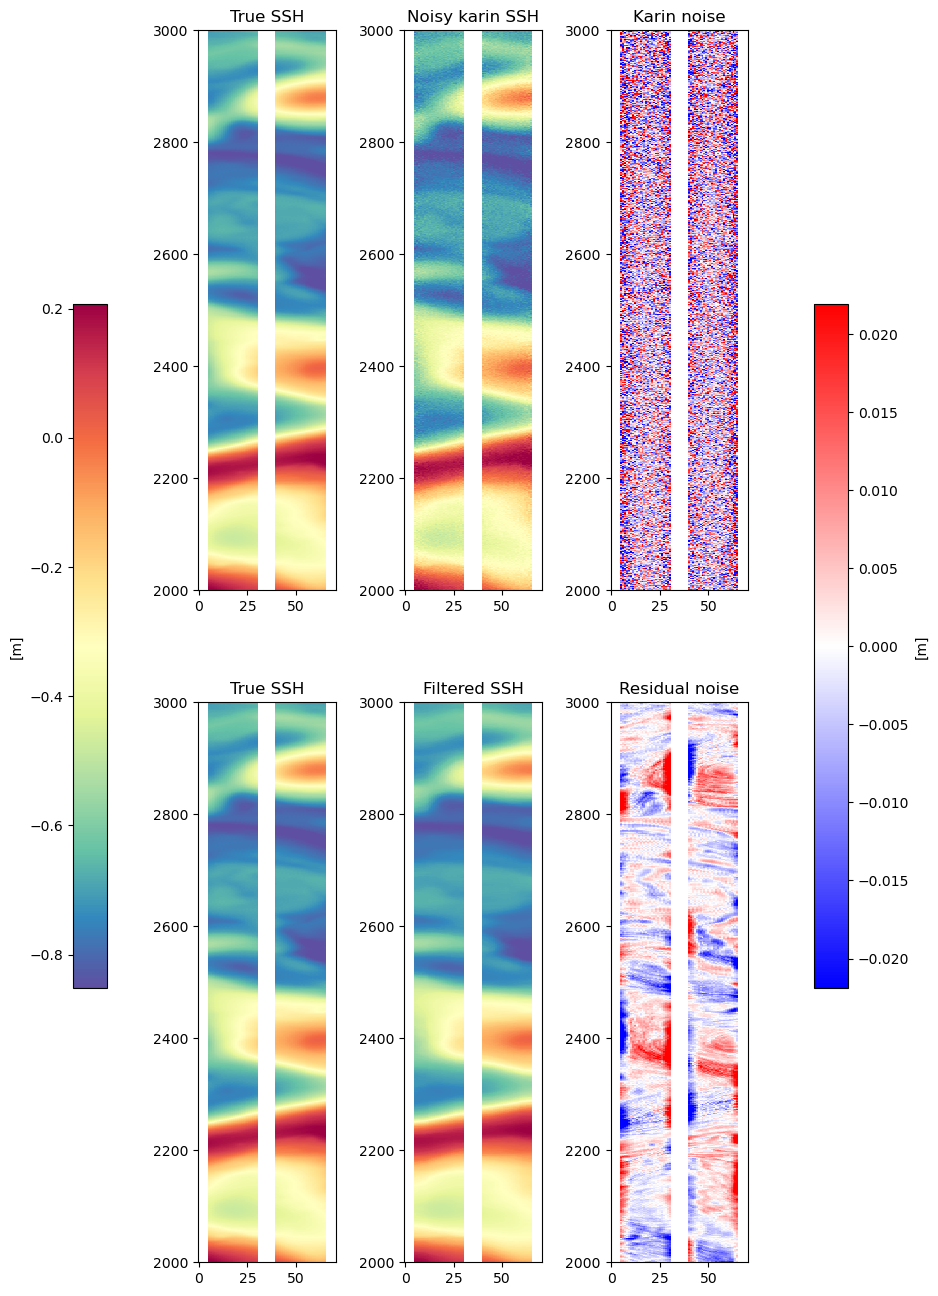

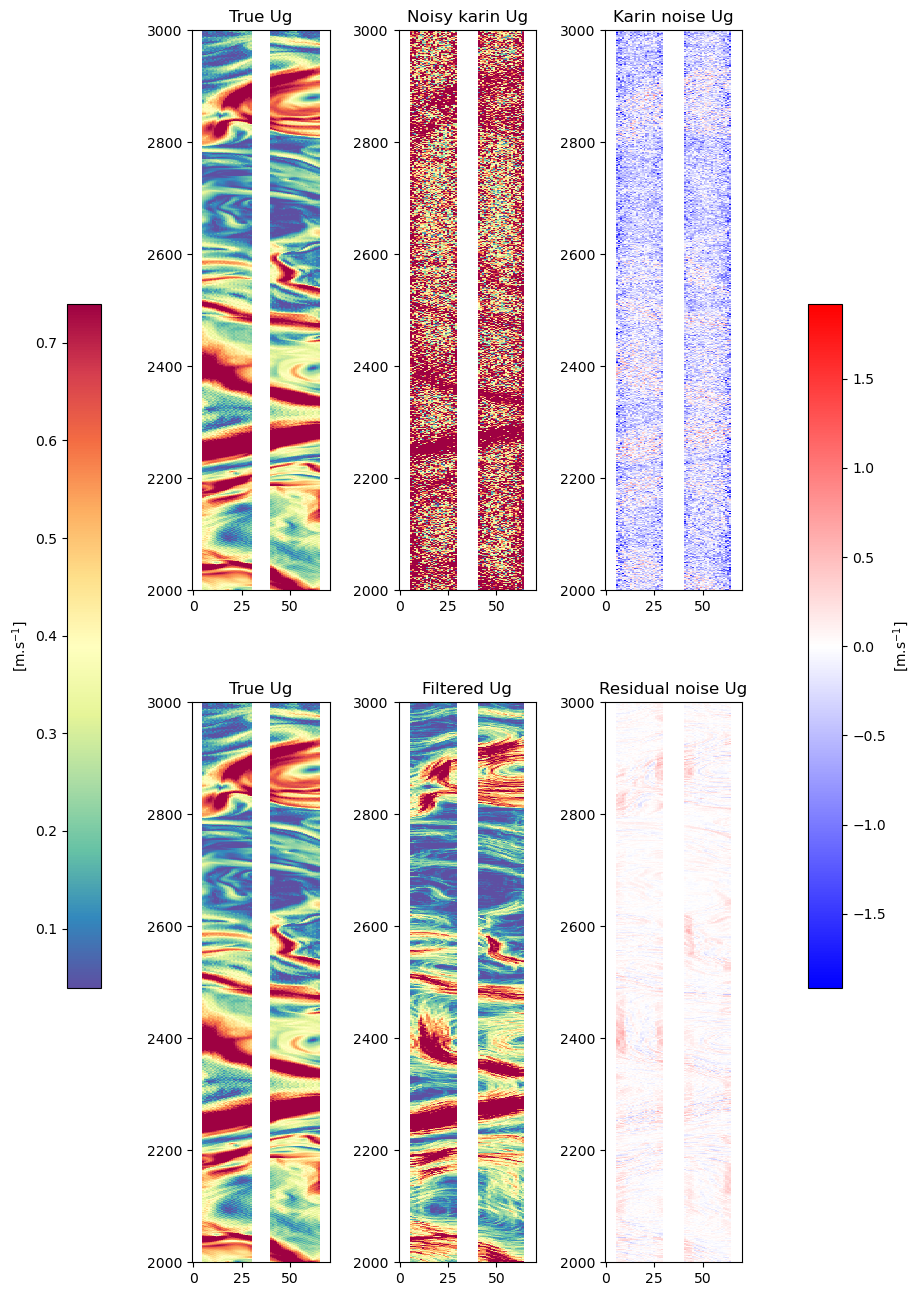

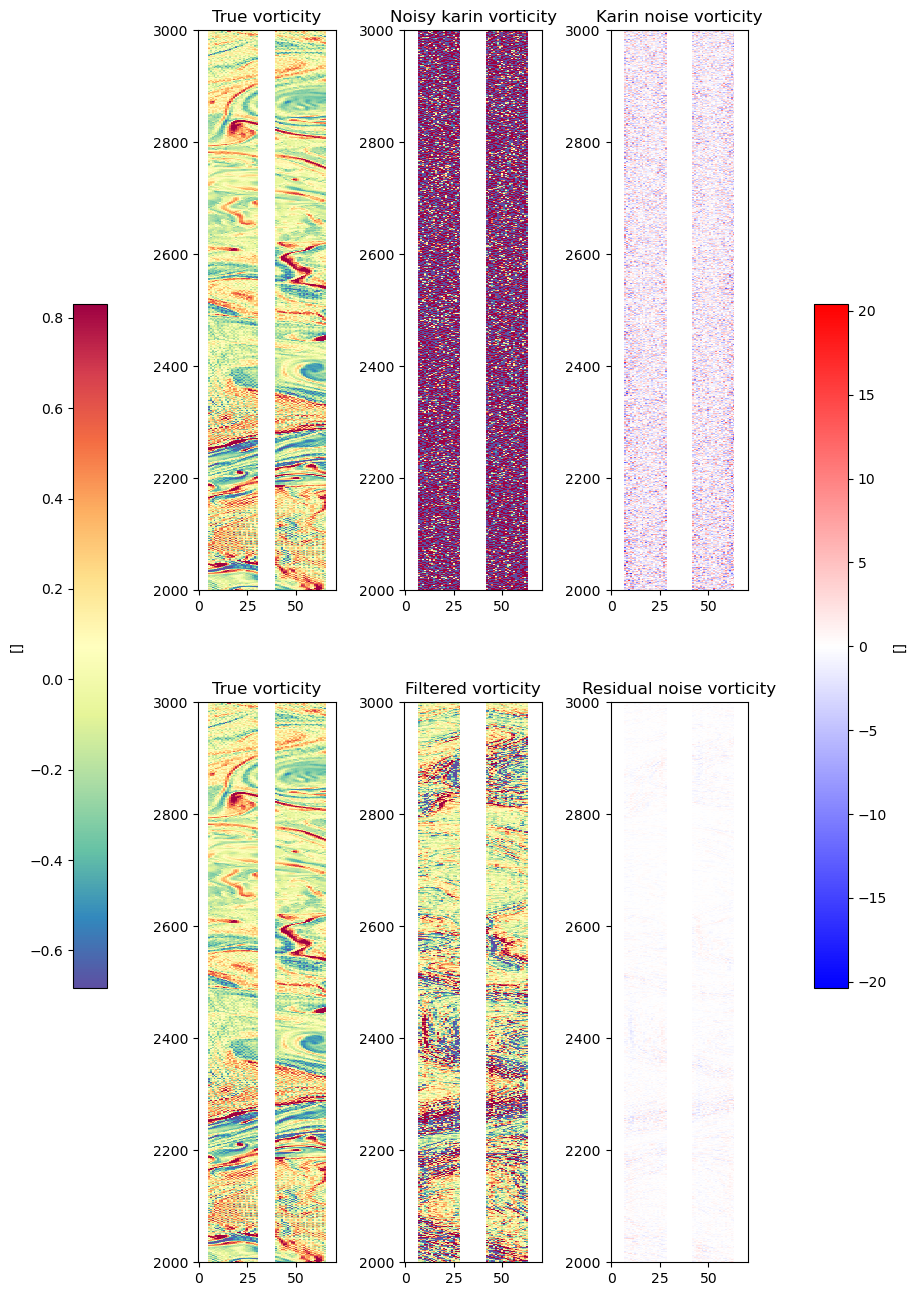

In [5]:
plot_demo_pass(list_of_file_inputs[3], list_of_file[0])

<div class="alert alert-info" role="alert">

<h2>3. Statistical & Spectral Analysis </h2>

</div>

## 3.1 Parameters

In [8]:

etuvar = 'ssh_karin_filt'
filter_name = 'quickstart'
output_dir = '../results'
stat_output_filename = f'{output_dir}/stat_quickstart.nc'
stat_by_regime_output_filename = f'{output_dir}/stat_by_regime_quickstart.nc'
psd_output_filename = f'{output_dir}/psd_quickstart.nc'
quickstart_bench = Benchmark()


## 3.2 Compute grid boxes statistics

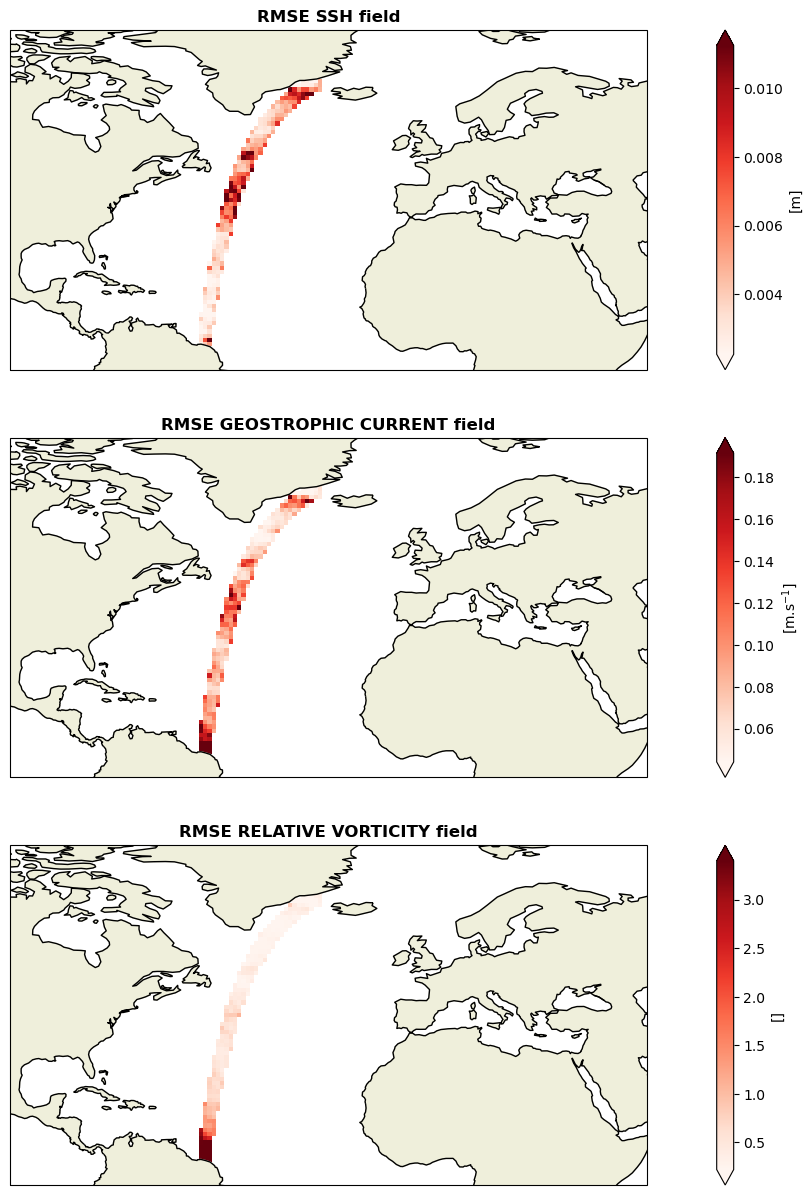

CPU times: user 1.58 s, sys: 385 ms, total: 1.96 s
Wall time: 1.97 s


In [11]:
%%time
# Compute gridded stats
quickstart_bench.compute_stats([list_of_file[0]], etuvar, [list_of_file_inputs[3]])

# Write gridded stats 
quickstart_bench.write_stats(stat_output_filename, filter=filter_name)

# Plot gridded stats
quickstart_bench.display_stats(stat_output_filename, xlim=(-100, 50), ylim=(0, 80))

## 3.3 Compute statistics by regime (coastal, offshore low variability, offshore high variability)

processing global
processing coastal
processing low var
processing high var
CPU times: user 1.32 s, sys: 46.4 ms, total: 1.37 s
Wall time: 2.3 s


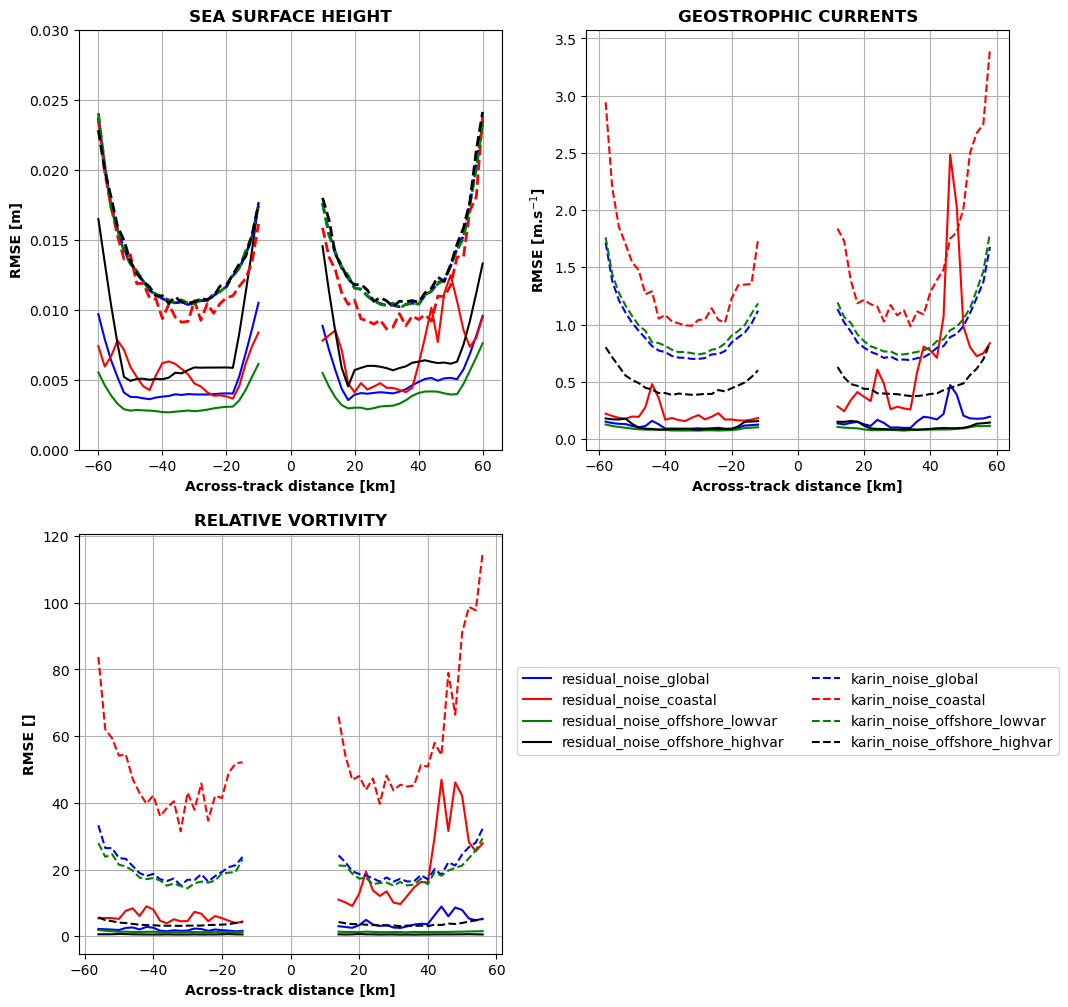

In [12]:
%%time
# Compute stats by regime
quickstart_bench.compute_stats_by_regime([list_of_file[0]], etuvar, [list_of_file_inputs[3]])

# Write stats by regime
quickstart_bench.write_stats_by_regime(stat_by_regime_output_filename, filter=filter_name)

# Plot stats by regime
quickstart_bench.plot_stats_by_regime(stat_by_regime_output_filename)

## 3.4 Compute Spectral scores

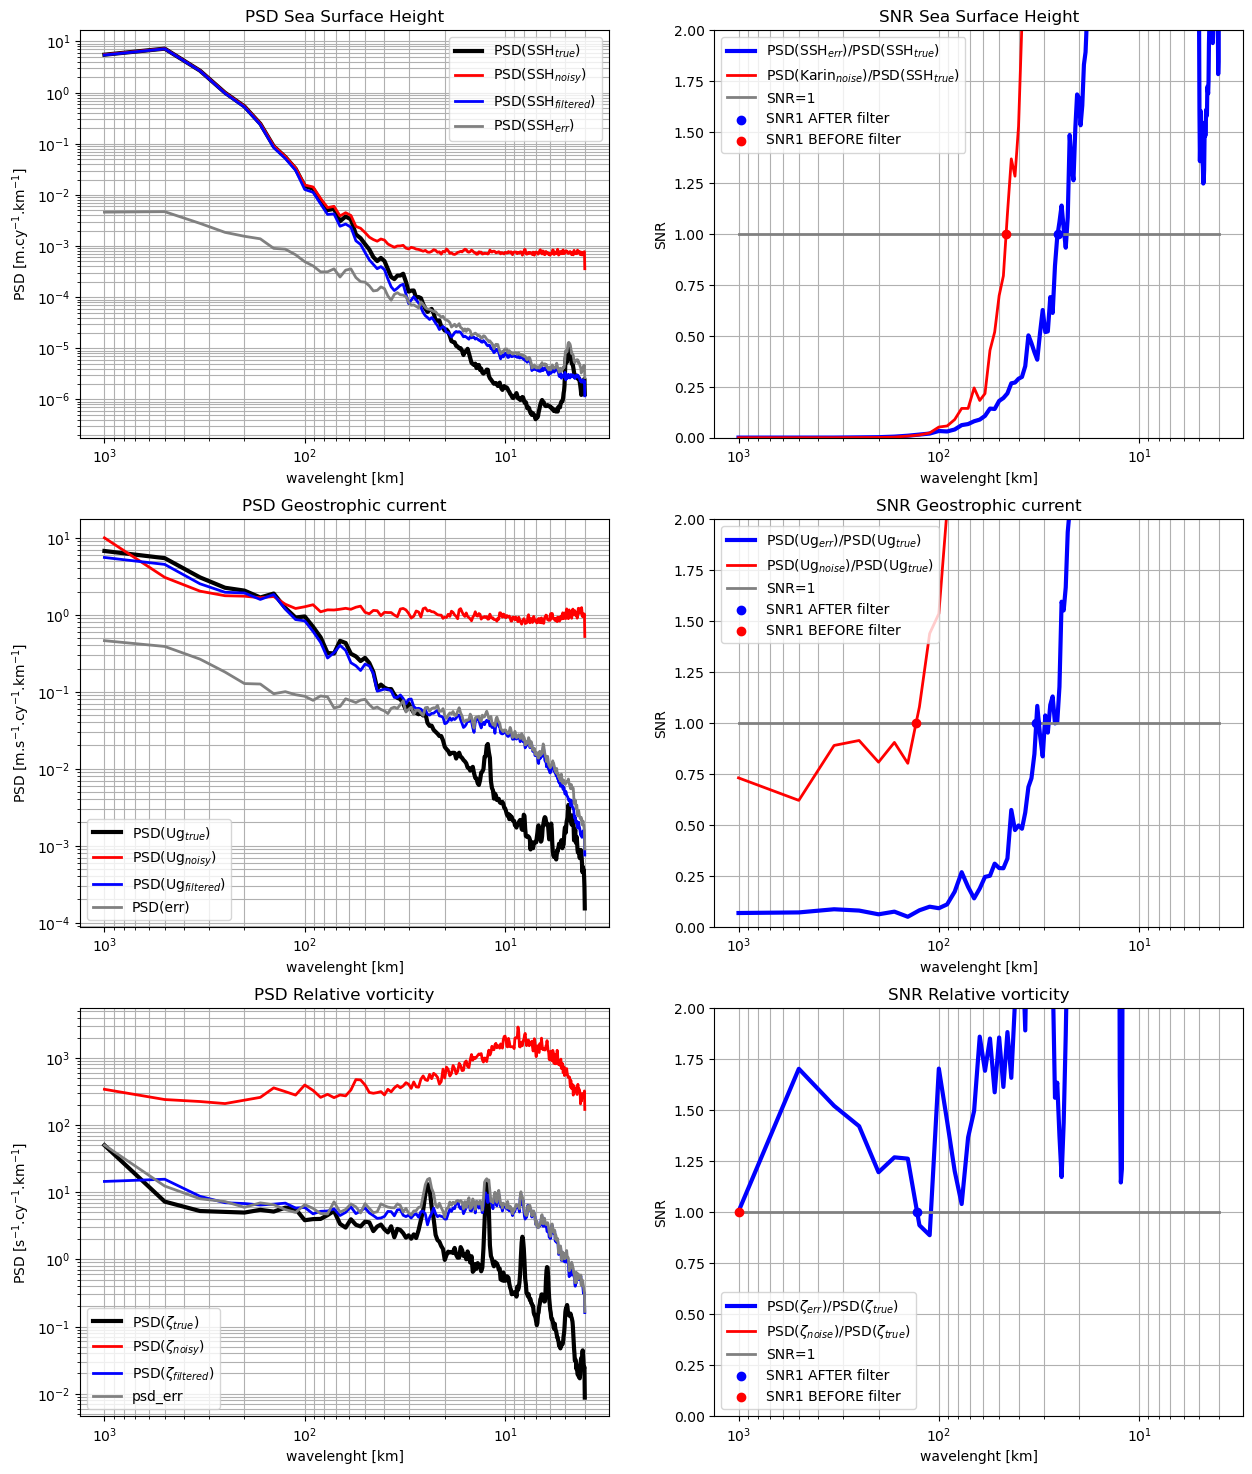

CPU times: user 3.98 s, sys: 143 ms, total: 4.12 s
Wall time: 4.34 s


In [13]:
%%time
# Compute PSD scores
quickstart_bench.compute_along_track_psd([list_of_file[0]], etuvar, [list_of_file_inputs[3]], lengh_scale=1000)

# Write PSD scores
quickstart_bench.write_along_track_psd(psd_output_filename, filter=filter_name)

# Plot PSD scores
quickstart_bench.display_psd(psd_output_filename)

<div class="alert alert-info" role="alert">

<h2>4. Leaderboard </h2>

</div>

In [14]:
quickstart_bench.summary('quickstart.ipynb')

Summary of the leaderboard metrics:
|    | Method        | Field                          |   µ(RMSE global) |   µ(RMSE coastal) |   µ(RMSE offshore lowvar) |   µ(RMSE offshore highvar) |   λ(SNR1) [km] | Reference        |
|---:|:--------------|:-------------------------------|-----------------:|------------------:|--------------------------:|---------------------------:|---------------:|:-----------------|
|  0 | BEFORE FILTER | SSH [m]                        |       0.0135385  |        0.0125125  |                 0.0135511 |                 0.0137523  |           46.1 | quickstart.ipynb |
|  1 | BEFORE FILTER | Geostrophic current [m.s$^-1$] |       0.940499   |        1.5038     |                 0.999086  |                 0.491603   |          129.9 | quickstart.ipynb |
|  2 | BEFORE FILTER | Relative vorticity []          |      20.8224     |       53.064      |                19.1733    |                 3.70722    |         1000   | quickstart.ipynb |
|  3 | quickstart    | S